<a href="https://colab.research.google.com/github/405250553/MMSLAB-TF2/blob/master/chapter-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/version/__init__.py'>

In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 450kB 44.3MB/s 
     |████████████████████████████████| 3.8MB 57.7MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [0]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/version/__init__.py'>

In [0]:
# 產生一個常數
c = tf.constant(4)
# 產生一個變數
v = tf.Variable(1)
print(c)
print(v)

tf.Tensor(4, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


In [0]:
x = tf.constant(4)
print(x)
print(tf.keras.backend.ndim(x),"維度Tensor\n")

x = tf.constant([1,2,3,4,5,6])
print(x)
print(tf.keras.backend.ndim(x),"維度Tensor\n")

x = tf.constant([[1,2,3],[4,5,6]])
print(x)
print(tf.keras.backend.ndim(x),"維度Tensor\n")

tf.Tensor(4, shape=(), dtype=int32)
0 維度Tensor

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)
1 維度Tensor

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
2 維度Tensor



In [0]:
import numpy as np

print("Eager Execution 是否啟動: {}".format(tf.executing_eagerly()))

Eager Execution 是否啟動: False


In [0]:
a = tf.constant(3)
b = tf.constant(4)

# 顯示Tensor數值 (在Eager Execution的功能下, format會直接將數值指派 "{}" , 不會有shape, dtype等資訊))
print("a = {}".format(a))
print("a+b =",a+b)
print("a*b =",a*b)

a = 3
a+b = tf.Tensor(7, shape=(), dtype=int32)
a*b = tf.Tensor(12, shape=(), dtype=int32)


In [0]:
a = tf.constant([[1,2], [3,4]], dtype="float32")
b = np.array([[1,0],[5,9]], dtype="float32")

#在Eager execution 的模式下, 可以混合tensor和numpy做運算
print("a+b = {}\n".format(a+b))
print("a*b =",format(tf.matmul(a,b)))
print("\na*b = {}\n".format(a*b))

print(a,'\n')
print(a.numpy(),'\n') #將tensor格式轉為numpy

a+b = [[ 2.  2.]
 [ 8. 13.]]

a*b = [[11. 18.]
 [23. 36.]]

a*b = [[ 1.  0.]
 [15. 36.]]

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

[[1. 2.]
 [3. 4.]] 



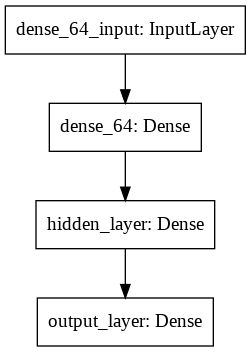

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

model_1 = keras.Sequential()
model_1.add(layers.Dense(64, activation = "relu", input_shape = (784,)))
model_1.add(layers.Dense(64, activation = "relu", name = "hidden_layer"))
model_1.add(layers.Dense(10, activation = "softmax", name = "output_layer"))

plot_model(model_1, to_file = "model-1.png")
Image("model-1.png")

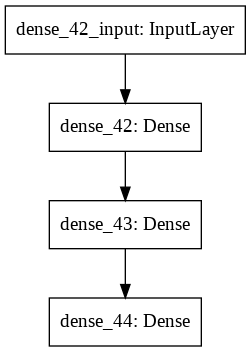

In [0]:
model_2 = keras.Sequential([layers.Dense(64, activation = "relu", input_shape = (784,))
                            , layers.Dense(64, activation = "relu")
                            , layers.Dense(10, activation = "softmax")])

plot_model(model_2, to_file = "model-2.png")
Image("model-2.png")

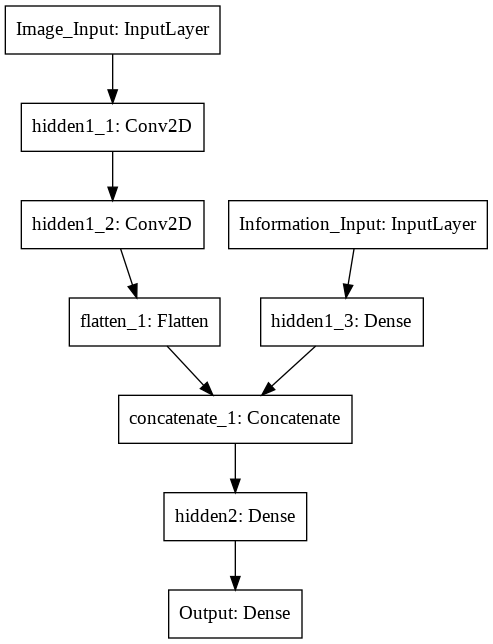

In [0]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
info_input = keras.Input(shape=(1, ), name='Information_Input')

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)
outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Model.png')

In [0]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
print(dataset)

for data in dataset.take(1):
    print(data)

<DatasetV1Adapter shapes: (10,), types: tf.int32>


RuntimeError: ignored